#  <center> A Complete Guide to Naive Bayes Classifiers </center>

### <center> Support me with an upvote if you find it useful! 👍 </center>

## Table of Contents

<a id="toc"></a>

- [1. Introduction](#1)
    - 1.1 What is a Naive Bayes Classifier?
    - 1.2 How does a Naive Bayes Classifier work?
        
        
- [2. How does it apply the Bayes' Theorem?](#2)
    - 2.1 The Bayes' Theorem
    - 2.2 The Class-Conditional Independence Assumption
    - 2.3 Multinomial Naive Bayes Classifier
    - 2.4 Why all these troubles?
    - 2.5 Guassian Naive Bayes Classifier


- [3. Example: SMS Spam Filtering](#3)
    - 3.1 Data Preprocess
    - 3.2 Multinomial Naive Bayes Classifier
    - 3.3 Hyperparameter Tuning


- [4. Example: Titanic Survival Prediction](#4)
    - 4.1 Data Preprocess
    - 4.2 Gaussian Naive Bayes Classifier
    - 4.3 Hyperparameter Tuning

Have a look at these notebooks if you want to learn about:

1. **Linear Regression**: [A Complete Guide to Linear Regression](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-linear-regression)
2. **Regularized Regression**: [A Complete Guide to Regularized Regressions](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-regularized-regressions)
3. **Logistic Regression**: [A Complete Guide to Logistic Regression](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-logistic-regression)
4. **Support Vector Machine**: [A Complete Guide to Support Vector Machine](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-support-vector-machine)
5. **Decision Trees & Tree Ensembles**: [A Complete Guide to Decision Trees & Ensembles](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-decision-trees-ensembles)

<a id="1"></a>

# <center>Introduction</center>

## What is a Naive Bayes Classifier？

**`Naive Bayes Classifier`** is a classification algorithm based on the **Bayes' theorem** and the **class-conditional independence assumption**. 

It is one of the most successful algorithms in solving **natural language processing** (NLP) problems, especially in **spam email filtering**. 

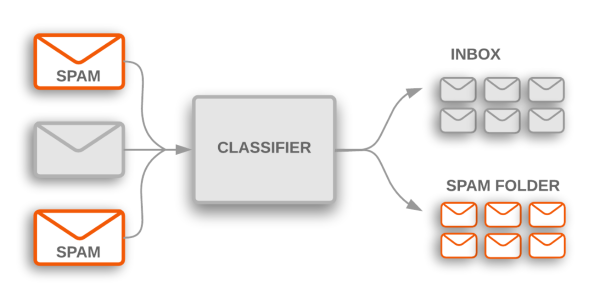

Image Source: https://medium.com/@naveeen.kumar.k/naive-bayes-spam-detection-7d087cc96d9d

## How does a Naive Bayes Classifier work?

For models like **Logistic Regression**, they are trying to learn the **probability** of getting a specific class of the **output variable Y** when given a set of **input variables X** using functions like the **sigmoid function**. This type of models are called **discriminative learning algorithms**.

**Naive Bayes Classifer**, on the other hand, is a **generative learning algorithm**. It learns the what are the **input variables X** like for a given class of **output variable Y**. Let me show you what this means:

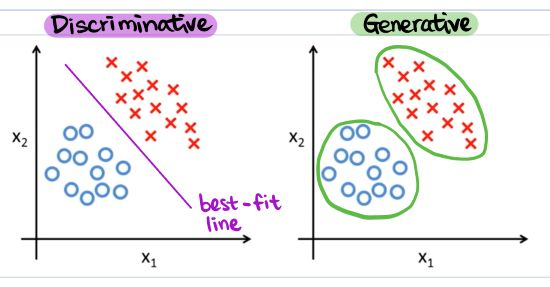

As demonstrated above, a **discriminative algorithm** like logistic regression will try to seperate the data points of different classes with a **straight line**, while a **generative algorithm** like naive bayes classifier will do the oppoisite.

To formulate this, we have:

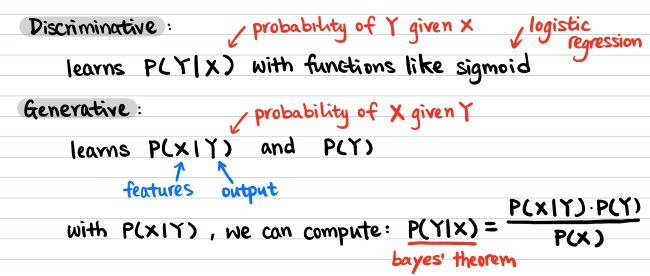

As shown above, the naive bayes classifier will first learn the probability that a set of **input variables X** will occur given a class of **output variable Y**, that is **P(X|Y)**. It then computes the desired probability **P(Y|X)** through the **bayes' theorem**.

<a id="2"></a>

# <center>How does it apply the Bayes' Theorem?</center>

## Bayes' Theorem

**`Bayes' theorem`** states that the probability of getting **Y (output variable) equals to specific class** given a **specific set of X (input variables)** can be computed as the following:

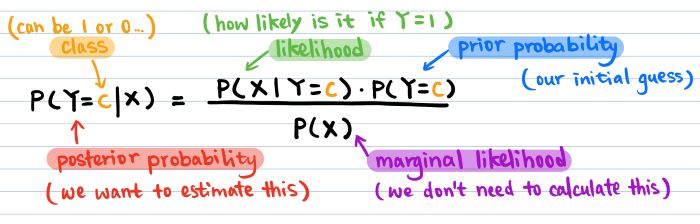

In the above formula, the **posterior probability** is the desired output. It is called **posterior** because it is the **adjusted probability** calculated based on our **initial guess P(Y=c)**, simple the percentage of the class within the training data. According to the theorem, this **posterior probability** is **directly proportional** to the product of the **likelihood** and **prior probability**. 

The **marginial likelihood** does not need to be calculated because it is a common **denominator** for all the probabilities P(Y=c|X) and therefore can be ignored. (We only have to compare the **numerators**)

However, there is a big problem with finding the **likelihood P(X|Y=c)**: with many input variables X (X1, X2, X3...), there will be a **huge number of combinations** which makes the calculation of the likelihood **nearly impossible**. How does the naive bayes classifer deal with this?

## The Class-Conditional Independence Assumption

To find the **posterior probability P(X|Y=c)**, we need to make a big assumption first. This is also the **key assumption** made by the naive bayes classifier: the **`class-conditional independence`** assumption.

**Class-conditional independence** assumes that the **overall likelihood** P(X1,X2,X3...|Y) is equal to the **product** of the **individual likelihoods**. In other words, it assumes **no relationships** among the input variables:

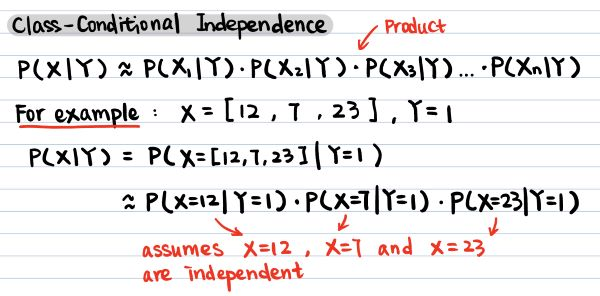

This assumption **reduces the variance** of the naive bayes classifier in the cost of an **additional bias**. For example, in natural language processing, there are always relationships among the words (input variable) that form a sentence. Therefore, the assumption will introduce a **bias** that lower the **classification performance** because of the omitted relationships. 

At the mean time, the assumption also decrease the **variance** of the model. Without the assumption, a **large training dataset** will be needed to find the **likelihood** and therefore making the model **highly dependent** on the training data (high variance).

But how do we actually calculate these probabilities when given a training dataset?

## Multinomial Naive Bayes Classifier

In general, there are **2 different ways** to calculate the probabilities needed for the **bayes' theorem**:

1. **Discrete variables**: find the **frequencies**
2. **Continuous variables**: use a **gaussian curve**

When the **input variables are discrete** (e.g. words in an email), we can directly use the **frequency** of a specific event happening within the training data as our **probability**. This type of naive bayes classifier called the **`Multinomial Naive Bayes Classifier`**.


Lets have a look at an example of **spam email classification**:

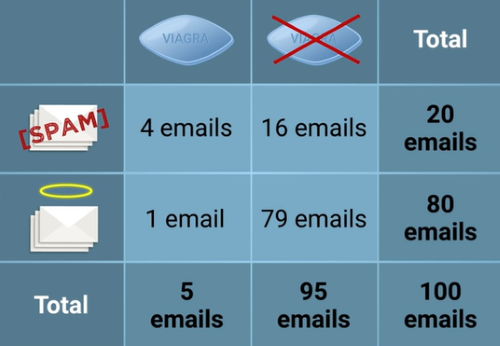

Here, we are trying to classify **spam and non-spam emails** depending on whether they contain the word **viagra**. From the above table, we can compute the **probabilities** as:

1. **Likelihood**: P(X=viagra|Y=spam) = 4/20 = 0.2
2. **Likelihoods** for other words can be calculated similarly as above
3. **Prior probability**: P(Y=spam) = 20/100 = 0.2

Then, we find the **product** of the **individual likelihoods** as our **overall likelihood** under the **class-conditional independence** assumption. Finally, the **posterior probability** is directly proportional to the **product** of the **overall likelihood** and the **prior probability**.

This **posterior probability** we calculated corresponds to the class of **spam** emails. We can do the same for the class of **non-spam** emails. We then compare the **posterior probabilities** of the 2 classes and go for the higher one.

## Why all these troubles?

Looking at the above table, some may ask why don't we just find the individual **posteriror probabilities** and calculate the **product** to get the final result instead of going through the calculations of **bayes' theorem**?

Let me show you with an example why the **assumption** can only be applied to the **likelihood** but not the **posteriror probability**:

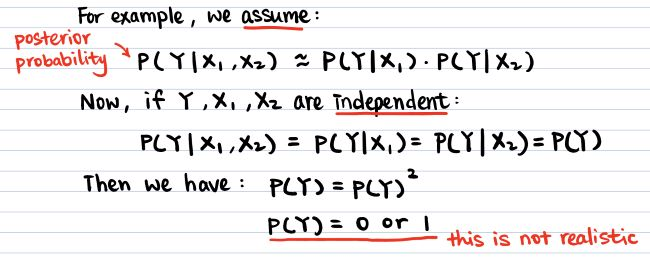

As you can see, the **assumption** will result in a non-realistic result and therefore cannot not be applied to the **posterior probability** directly.

## Gaussian Naive Bayes Classifier

Now, let's talk about the naive bayes classifier that deals with **continuous input variables**: the **`Gaussian Naive Bayes Classifier`**.

The **gaussian naive bayes classifier** makes an additional assumption: it assumes that each of the input variables follows a **normal distribution**. Therefore, the classifier finds the **likelihood** using a **gaussian curve** (the probability curve for a normal distribution) instead of calculating the **frequencies**.

Let me show you how this is done with an example of **classifying gender using age**:

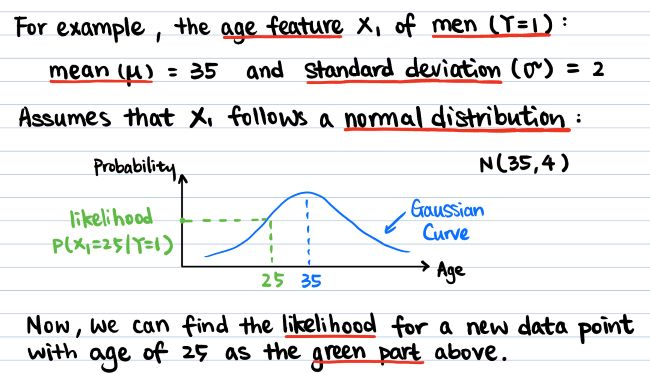

With the **mean** and **standard deviation**, we can draw a **gaussian curve** for the age feature. Then, the **likelihood** of having a **specific age** given the new data point represents a **male** can be find using the curve as demonstrated above.

Similar to the multinomial naive bayes classifier, the **gaussian naive bayes classifier** first calculates the **individual likelihood**. Then, it computes the **overall likelihood** by applying the **class-conditional independence** assumption. Finally, it finds the **posterior probability** for each class and compare them to reach a classification result.

## <a id="3"></a>

# <center>Example: SMS Email Filtering</center>

The data comes from: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

Thanks to: https://www.kaggle.com/code/pablovargas/naive-bayes-svm-spam-filtering/notebook for data preparation

In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

### Import Data

In [2]:
df = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Preprocess

In [3]:
#remove the stop words and transform the texts into the vectorized input variables X
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["v2"])

#transform the values of the output variable into 0 and 1
y = df["v1"].map({'spam':1,'ham':0})

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Multinomial Naive Bayes Classifier

The multinomial NB classifier has a hyperparameter called **`alpha`**. It is the **smoothing parameter** to avoid **zero counts** when calculating the frequencies. 

For example, if we are now classifying a new SMS with a word "ryan" which never exist in the spam emails within our training dataset, the **likelihood** for this word will be zero. This will casue the **overall likelihood** to be zero (because we take the product of all **individual likelihoods**) for no matter what class of output variable we have.

Therefore, we need to add **additional counts** to each word when calculating the frequencies to avoid have a zero likelihood value. **Alpha** indicates how many **additional counts** we add.

In [4]:
#train and evaluate models with different alpha values
alpha_values = np.arange(0.01, 10, 0.01)
accuracy_scores, recall_scores, precision_scores = [], [], []

for alpha in alpha_values:
    NB = MultinomialNB(alpha=alpha)
    NB.fit(X_train, y_train)
    accuracy_scores.append(metrics.accuracy_score(y_test, NB.predict(X_test)))
    recall_scores.append(metrics.recall_score(y_test, NB.predict(X_test)))
    precision_scores.append(metrics.precision_score(y_test, NB.predict(X_test)))

performance_NB = pd.DataFrame(columns=['alpha', 'accuracy', 'recall', 'precision'])
performance_NB['alpha'] = alpha_values
performance_NB['accuracy'] = accuracy_scores
performance_NB['recall'] = recall_scores
performance_NB['precision'] = precision_scores
performance_NB.head()

,alpha,accuracy,recall,precision
0,0.01,0.980263,0.953782,0.911647
1,0.02,0.980263,0.962185,0.905138
2,0.03,0.980861,0.962185,0.908730
3,0.04,0.980861,0.962185,0.908730
4,0.05,0.980861,0.966387,0.905512


In [5]:
#finds the best alpha value
best_index = performance_NB['accuracy'].idxmax()
performance_NB.iloc[best_index, :]

alpha        3.800000
accuracy     0.983852
recall       0.911765
precision    0.973094
Name: 379, dtype: float64

## <a id="4"></a>

# <center>Example: Titanic Survival Prediction</center>

The data comes from the competition: https://www.kaggle.com/competitions/titanic

Thanks to: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

### Import Data

In [6]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

### Data Preprocess

In [7]:
#missing values
df_train = df_train.dropna(subset=['Embarked'])
df_train['Age'].fillna(round(df_train['Age'].dropna().mean()), inplace=True)
df_test['Age'].fillna(round(df_test['Age'].dropna().mean()), inplace=True)

#feature engineering: family size
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_train['Alone'] = df_train['FamilySize'].map({1:1})
df_train['Alone'].fillna(0, inplace=True)
df_test['Alone'] = df_test['FamilySize'].map({1:1})
df_test['Alone'].fillna(0, inplace=True)

#feature engineering: age band
bins = [0, 15, 30, 60, 81]
labels = [0, 1, 2, 3]
df_train['AgeBand'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
df_test['AgeBand'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)

#feature engineering: fare band
bins = [0, 8, 14, 31, 513]
labels = [0, 1, 2, 3]
df_train['FareBand'] = pd.cut(df_train['Fare'], bins=bins, labels=labels, right=False)
df_test['FareBand'] = pd.cut(df_test['Fare'], bins=bins, labels=labels, right=False)

#encode categorical variables
df_train['Sex'] = df_train['Sex'].map({'male':1, 'female':0})
df_test['Sex'] = df_test['Sex'].map({'male':1, 'female':0})
df_train = pd.get_dummies(df_train, columns= ['Embarked'])
df_test = pd.get_dummies(df_test, columns= ['Embarked'])
df_train.drop(columns=['Embarked_S'], inplace=True)
df_test.drop(columns=['Embarked_S'], inplace=True)

#create datasets for modelling
X_train = df_train.drop(columns=['Survived','Name','Age','SibSp','Parch','Fare','PassengerId','Ticket','Cabin'])
y_train = df_train['Survived']
X_test = df_test.drop(columns=['Name','Age','SibSp','Parch','Fare','Ticket','Cabin']).copy()

#create the validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

### Gaussian Naive Bayes Classifier

There is one hyperparameter we need to tune: **`var_smoothing`**. This is the **portion of the largest variance** of all features that is added to variances for **calculation stability**.

In [8]:
#train models with different smoothing values
smooth_values = np.linspace(1e-9, 1e-2, 1000)
accuracy_scores, recall_scores, precision_scores = [], [], []

for smooth in smooth_values:
    GNB = GaussianNB(var_smoothing=smooth)
    GNB.fit(X_train, y_train)
    accuracy_scores.append(metrics.accuracy_score(y_valid, GNB.predict(X_valid)))
    recall_scores.append(metrics.recall_score(y_valid, GNB.predict(X_valid)))
    precision_scores.append(metrics.precision_score(y_valid, GNB.predict(X_valid)))

performance_GNB = pd.DataFrame(columns=['smooth', 'accuracy', 'recall', 'precision'])
performance_GNB['smooth'] = smooth_values
performance_GNB['accuracy'] = accuracy_scores
performance_GNB['recall'] = recall_scores
performance_GNB['precision'] = precision_scores
performance_GNB.head()

,smooth,accuracy,recall,precision
0,1.000000e-09,0.737828,0.7,0.675439
1,1.001101e-05,0.737828,0.7,0.675439
2,2.002102e-05,0.737828,0.7,0.675439
3,3.003103e-05,0.737828,0.7,0.675439
4,4.004104e-05,0.737828,0.7,0.675439


In [9]:
#finds the best smoothing value
best_index = performance_GNB['accuracy'].idxmax()
performance_GNB.iloc[best_index, :]

smooth       0.006096
accuracy     0.752809
recall       0.700000
precision    0.700000
Name: 609, dtype: float64